In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv('StudentsPerformance.csv')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [8]:
1#Males and Females participated in the test
print(f"Male : {len(data[data['gender'] == 'male'])}")
print(f"Female : {len(data[data['gender'] == 'female'])}")

Male : 482
Female : 518


In [ ]:
2#What do you think about the students' parental level of education

In [56]:
data_1=data.groupby(['parental level of education']).size()
data_1

parental level of education
associate's degree    222
bachelor's degree     118
high school           196
master's degree        59
some college          226
some high school      179
dtype: int64

<AxesSubplot:title={'center':'Parental level of education'}>

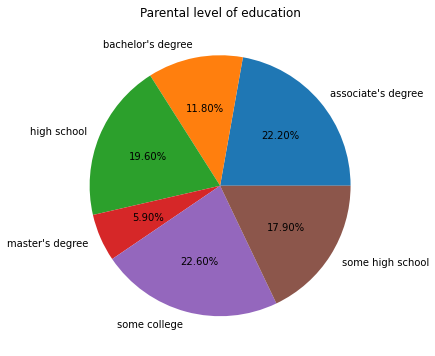

In [72]:
#Visualization
data_1.plot.pie(y='parental level of education',figsize=(6,6),autopct='%1.2f%%',title='Parental level of education',
                ylabel='')
                   

In [ ]:
### Parental Level of Eductaion graph shows that only 5.9% has masters degree and  most of them have degree from some colleges.

3#Who scores the most on average for math, reading and writing based on
#Gender

In [79]:
data_1=data.groupby('gender')[['math score','reading score','writing score']].mean()
data_1

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


Text(0, 0.5, 'Scores')

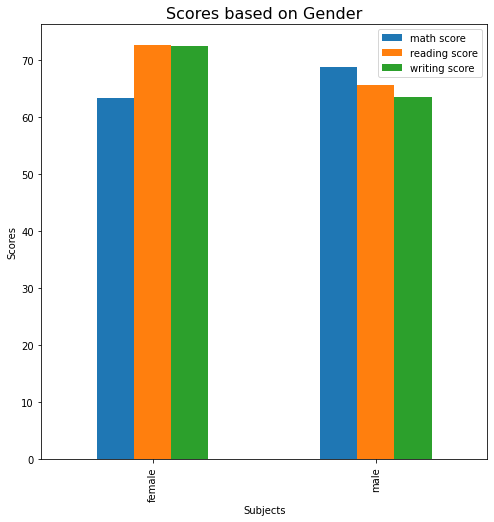

In [83]:
#Visualization
data_1.plot(kind='bar',figsize=(8,8))
plt.title('Scores based on Gender',fontsize= 16)
plt.xlabel('Subjects')
plt.ylabel('Scores')

In [ ]:
# We can see from the graph that Male students average in math score is more while female performs well in reading and writing#

In [40]:
#b.Test preparation course
data_2=data.groupby('test preparation course')[['math score','reading score','writing score']].mean()
data_2

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


Text(0, 0.5, 'Scores')

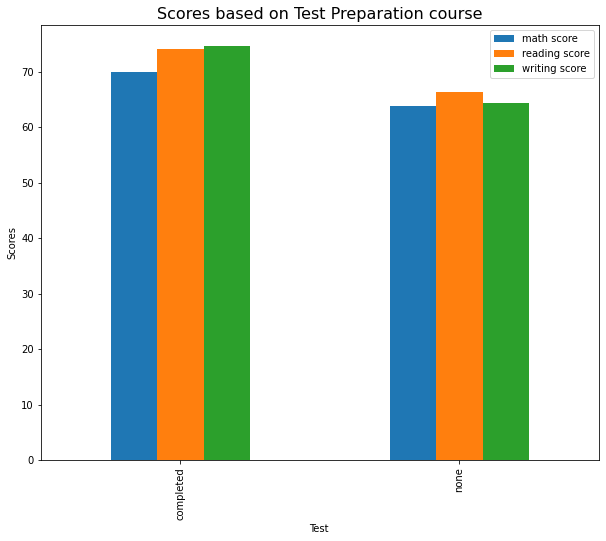

In [41]:
#Visualization
data_2.plot(kind='bar',figsize=(10,8))
plt.title('Scores based on Test Preparation course',fontsize= 16)
plt.xlabel('Test ')
plt.ylabel('Scores')

In [ ]:
# From the graph we can clearly see that score of test completed students is more rather than those who didn't complete

In [ ]:
#4.What do you think about the scoring variation for math, reading and writing based on a. Gender

In [73]:
data_3=data.groupby('gender')[['math score','reading score','writing score']].agg(['std','var']).round(2)
data_3


math score         reading score         writing score        
              std     var           std     var           std     var
gender                                                               
female      16.03  256.96         14.41  207.68         14.84  220.37
male        14.56  211.89         14.15  200.21         14.23  202.41

In [ ]:
#The variation of score is seeing more in females than males.

In [74]:
#b.Test preparation course
data_4=data.groupby('test preparation course')[['math score','reading score','writing score']].agg(['std','var']).round(2)
data_4

math score         reading score          \
                               std     var           std     var   
test preparation course                                            
completed                    14.52  210.88         13.54  183.27   
none                         15.71  246.67         14.61  213.42   

                        writing score          
                                  std     var  
test preparation course                        
completed                       13.24  175.20  
none                            15.04  226.25

In [ ]:
# Clearly the variation is more in those who doesn't do the test preparation course

In [ ]:
#5.The top 25% of students based on their maths score

In [75]:
data_5=data.sort_values(by='math score',ascending=False)
data_5
q3=data_5['math score'].quantile(q=.75)
high_math_score=data_5[data_5['math score']>=q3].drop(columns=['lunch','reading score','writing score'])
high_math_score

,gender,race/ethnicity,parental level of education,test preparation course,math score
999,male,group E,bachelor's degree,completed,100
996,male,group A,some college,completed,100
515,female,group E,some college,none,100
517,female,group E,associate's degree,none,100
516,female,group E,bachelor's degree,none,100
...,...,...,...,...,...
851,male,group D,some college,completed,77
849,male,group A,bachelor's degree,none,77
850,male,group C,associate's degree,none,77
421,female,group C,some college,none,77


In [ ]:
# these are the list of top 25% of students based on math score who are eligible to get bonus points